In [12]:
from bs4 import BeautifulSoup
import urllib2
import shutil
import requests
from urlparse import urljoin
import sys
import time
from requests import get

In [13]:
url = 'https://paytm.com/flights'
response = get(url)
print(response.text[:500])

<!doctype html><html class="no-js" lang="en"><head><meta charset="utf-8"><link rel="dns-prefetch" href="//drg5ie3bz46tr.cloudfront.net"/><link rel="dns-prefetch" href="//cdn.ravenjs.com"/><link rel="dns-prefetch" href="//travel.paytm.com"/><link rel="canonical" href="https://paytm.com/flights"/><meta http-equiv="x-ua-compatible" content="ie=edge"><title>Flight Tickets, Flight Booking Online, Book Cheap Flights, Air Tickets @ Paytm</title><meta name="description" content="Book Cheap Flight Ticket


<!doctype html><html class="no-js" lang="en"><head><meta charset="utf-8"><link rel="dns-prefetch" href="//drg5ie3bz46tr.cloudfront.net"/><link rel="dns-prefetch" href="//cdn.ravenjs.com"/><link rel="dns-prefetch" href="//travel.paytm.com"/><link rel="canonical" href="https://paytm.com/flights"/><meta http-equiv="x-ua-compatible" content="ie=edge"><title>Flight Tickets, Flight Booking Online, Book Cheap Flights, Air Tickets @ Paytm</title><meta name="description" content="Book Cheap Flight Tickets online at Paytm. Exciting offer on Domestic, International Flights Booking. ✈ Book Flight Tickets at Ease ✈ Lowest Airfares Guaranteed."><meta name="og:title" property="og:title" content="Flight Tickets, Flight Booking Online, Book Cheap Flights, Air Tickets @ Paytm"><meta name="og:description" property="og:description" content="Book Cheap Flight Tickets online at Paytm. Exciting offer on Domestic, International Flights Booking. ✈ Book Flight Tickets at Ease ✈ Lowest Airfares Guaranteed."><met
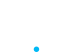
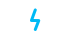
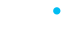
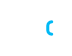
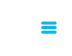
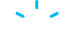
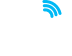
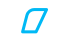
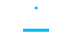
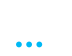
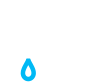
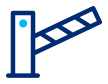
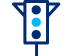
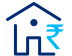

In [14]:
print(response.text)

In [15]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [31]:
img = html_soup.find_all(attrs={'class':"OfferCard"})
promo=html_soup.find_all(attrs={'class':"PromoCode"})

6


In [36]:
l=1
paytm_flight_offer=[]
for i in range(0,len(img)):
    m={}
    img_src=img[i]['src']
    promo_code=promo[i].find('span').text
    m['src']=img_src
    m['promocode']=promo_code
    paytm_flight_offer.append(m)
print(paytm_flight_offer)

[{'src': u'https://s3-us-west-2.amazonaws.com/paytm-travel/Marketing/Rajesh/SUMMERFLY_Carousel+(1).jpg', 'promocode': u'SUMMERFLY'}, {'src': u'https://s3-us-west-2.amazonaws.com/paytm-travel/Marketing/Rajesh/flytwo.jpg', 'promocode': u'FLYTWO'}, {'src': u'https://s3-us-west-2.amazonaws.com/paytm-travel/Marketing/Rajesh/FLY2019_Carousel_640X378+(1).jpg', 'promocode': u'FLY2019'}, {'src': u'https://s3-us-west-2.amazonaws.com/paytm-travel/Marketing/Prachi/Carousel---International-Flights-640x372-(2).jpg', 'promocode': u'FLYINT100'}, {'src': u'https://s3-us-west-2.amazonaws.com/paytm-travel/Marketing/Prachi/FLYINTL_Carousel.jpg', 'promocode': u'FLYINTL'}, {'src': u'https://s3-us-west-2.amazonaws.com/paytm-travel/Marketing/Prachi/FLYSTAR_Carousel.jpg', 'promocode': u'FLYSTAR'}]


In [37]:
import json
filepath="/Users/pverma/Desktop/WEB/back_end/json/flight/paytm_flight.json"
with open(filepath, 'w') as outfile:
    json.dump(paytm_flight_offer, outfile)